In [1]:
# import logging
import os
import re
from pathlib import Path
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import torch
import yaml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
from mushroom.mushroom import Mushroom
import mushroom.data.xenium as xenium
import mushroom.data.visium as visium
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/data/estorrs/miniconda3/envs/mushroom/lib/python3.9/site-packages/spatialdata/__init__.py:9: UserWarning: Geopandas was set to use PyGEOS, changing to shapely 2.0 with:

	geopandas.options.use_pygeos = True

If you intended to use PyGEOS, set the option to False.
  _check_geopandas_using_shapely()


In [5]:
run_dir = '/data/estorrs/mushroom/data/projects/xenium_grant'
mushroom_dir = os.path.join(run_dir, 'mushroom')
config_fps = sorted(utils.listfiles(mushroom_dir, regex=r'/config_xenium_multiplex.yaml'))
config_fps

['/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/HT206B1/config_xenium_multiplex.yaml',
 '/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-25943/config_xenium_multiplex.yaml',
 '/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-9906/config_xenium_multiplex.yaml']

In [6]:
xenium_config = {
    'dtype': 'multiplex',
#     'sections': config,
    'chkpt_filepath': None,
    'sae_kwargs': {
        'size': 8,
        'patch_size': 1,
        'encoder_dim': 256,
        'kl_scaler': 0.,
        'recon_scaler': 1.,
        'neigh_scaler': .0,
        'codebook_size': 30,
        'decoder_dims': (256, 256, 256,)
    },
    'learner_kwargs': {
        'scale': 1.,
        'contrast_pct': None,
#         'pct_expression': .02,
        'batch_size': 64,
        'num_workers': 1,
        'device': 'cpu',
#         'channels': channels,
#         'channel_mapping': channel_mapping
    },
    'train_kwargs': {
        'num_iters': 5000,
        'lr': 1e-4,
        'log_every': 10,
        'save_every': 200,
#         'save_dir': chkpt_dir       
    },
}

In [7]:
config_fp = '/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-25943/config_xenium_multiplex.yaml'

case = config_fp.split('/')[-2]
out_dir = os.path.join(f'/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/{case}_xenium/outputs')

config = yaml.safe_load(open(config_fp))

chkpt_dir = os.path.join(out_dir, 'chkpts')
Path(chkpt_dir).mkdir(parents=True, exist_ok=True)

In [8]:
xenium_config['sections'] = config
xenium_config['train_kwargs']['save_dir'] = chkpt_dir
xenium_config['chkpt_filepath'] = os.path.join(chkpt_dir, '4000iter.pt')

In [9]:
mushroom = Mushroom.from_config(xenium_config)

INFO:root:using device: cpu
INFO:root:generating inputs for multiplex tissue sections
INFO:root:using 477 channels
INFO:root:4 sections detected: ['s0', 's1', 's2', 's4']
INFO:root:processing sections
INFO:root:generating image data for section s0
INFO:root:generating image data for section s1
INFO:root:generating image data for section s2
INFO:root:generating image data for section s4
INFO:root:generating training dataset
INFO:root:generating inference dataset
INFO:root:creating data loaders
INFO:root:creating ViT
INFO:root:learner initialized


In [10]:
mushroom.embed_sections()

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's1'}>, <Axes: title={'center': 's2'}>,
        <Axes: title={'center': 's4'}>],
       [<Axes: ylabel='true'>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

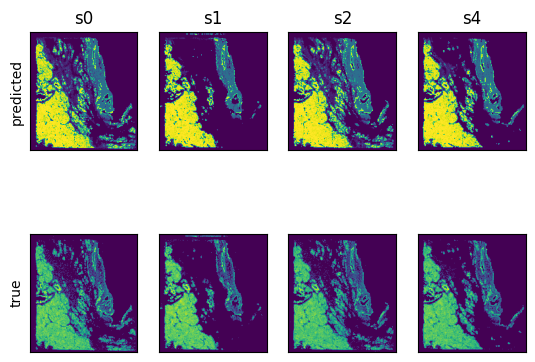

In [11]:
mushroom.display_predicted_pixels(channel='EPCAM')

array([[<Axes: title={'center': 's0'}, ylabel='predicted'>,
        <Axes: title={'center': 's1'}>, <Axes: title={'center': 's2'}>,
        <Axes: title={'center': 's4'}>],
       [<Axes: ylabel='true'>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

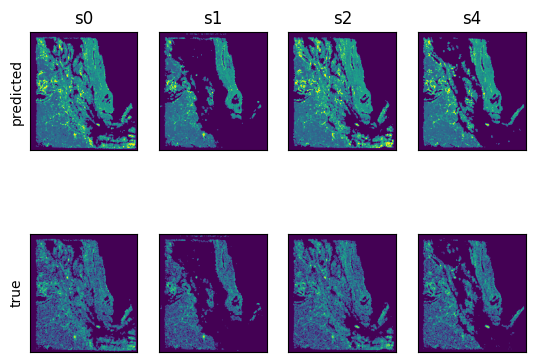

In [12]:
mushroom.display_predicted_pixels(channel='PTPRC')

In [13]:
cluster_ids = mushroom.cluster_ids.cpu().detach().numpy()

In [14]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 14 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 14 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nine', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 2

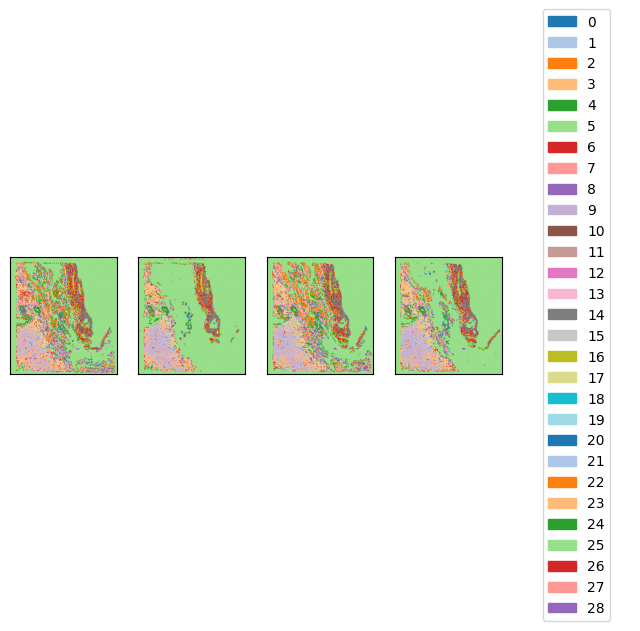

In [15]:
vis_utils.display_clusters(cluster_ids)
plt.savefig(os.path.join(out_dir, 'xenium_neighborhoods.pdf'))

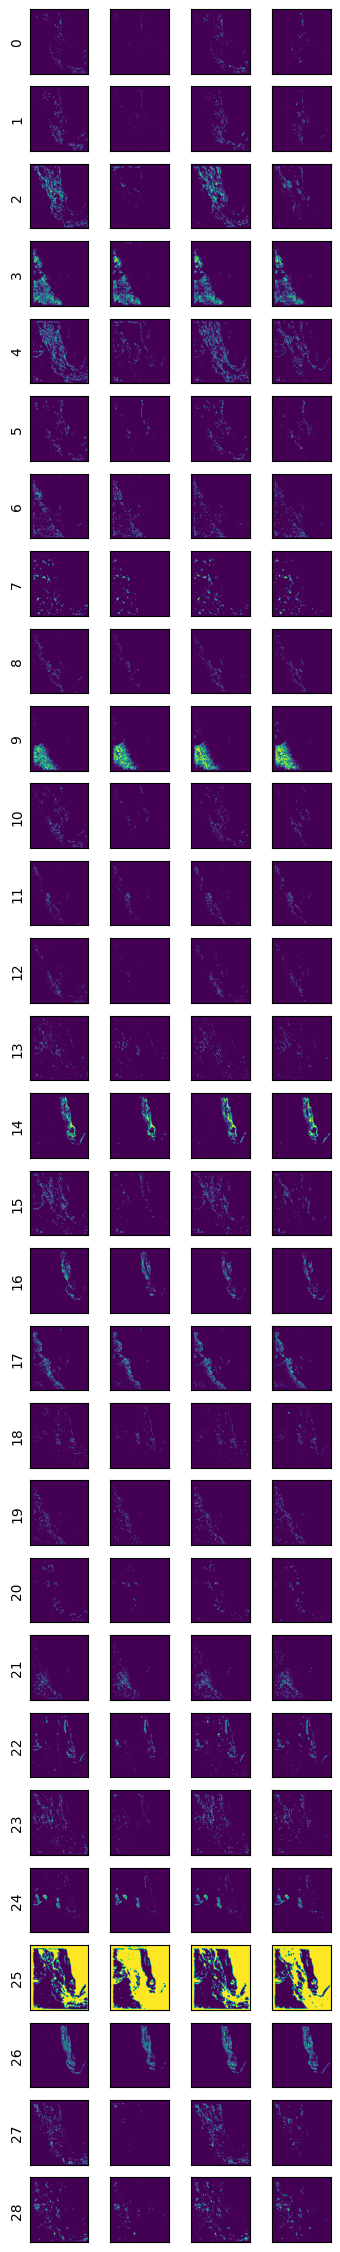

In [16]:
utils.display_cluster_probs(mushroom.cluster_probs)

In [17]:
# S18-25943-A7	S18-25943-A7-U1	xenium	0	0	pancreas
# S18-25943-A7	S18-25943-A7-U2	multiplex	1	5	pancreas
# S18-25943-A7	S18-25943-A7-U4	xenium	2	15	pancreas
# S18-25943-A7	S18-25943-A7-U8	xenium	3	35	pancreas
# S18-25943-A7	S18-25943-A7-U9	multiplex	4	40	pancreas
# S18-25943-A7	S18-25943-A7-U11	xenium	5	50	pancreas
# S18-25943-A7	S18-25943-A7-U13	multiplex	6	60	pancreas
# S18-25943-A7	S18-25943-A7-U16	multiplex	7	75	pancreas

In [18]:
section_positions = (np.asarray([0,15,35,50]) * .2).astype(int)
print(section_positions)
cluster_volume = utils.get_interpolated_volume(cluster_ids, section_positions)
cluster_volume.shape

[ 0  3  7 10]


(10, 180, 164)

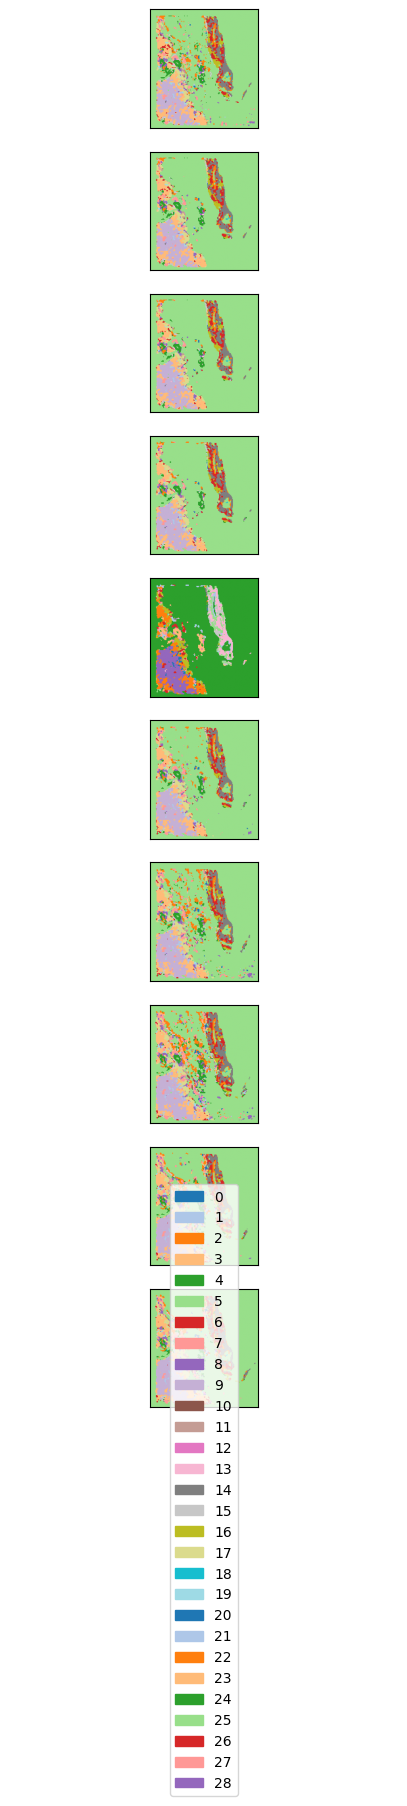

In [19]:
vis_utils.display_clusters(cluster_volume, horizontal=False)

In [20]:
probs = rearrange(mushroom.cluster_probs, 'n c h w -> c n h w').cpu().detach().numpy()
probs_volume = utils.get_interpolated_volume(probs, section_positions, method='linear')

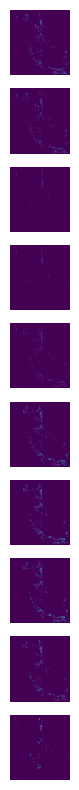

In [21]:
fig, axs = plt.subplots(nrows=probs_volume.shape[1], figsize=(5, probs_volume.shape[1]))
for i, ax in enumerate(axs):
    ax.imshow(probs_volume[0, i])
    ax.axis('off')
    

In [22]:
out_fp = os.path.join(out_dir, 'outputs.npy')
np.save(out_fp, {
    'cluster_ids': cluster_ids,
    'cluster_probs': probs,
    'cluster_volume': cluster_volume,
    'section_positions': section_positions
})


In [23]:
out_fp

'/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-25943_xenium/outputs/outputs.npy'

In [24]:
gene_sets = {
    'T cell/NK': ['CD3D', 'CD4', 'FOXP3', 'GZMB'],
    'Macrophage': ['CD68', 'CD163'],
    'B cell': ['MS4A1'],
    'Fibroblast': ['ACTA2'],
    'Epithelial': ['EPCAM', 'KRT7'],
    'Endothelial': ['PECAM1']
}

for k, gs in gene_sets.items():
    for g in gs:
        if g not in mushroom.learner.channels:
            print(k, g)

In [25]:
cluster_df = mushroom.get_cluster_intensities(cluster_ids)
cluster_df.index.name = 'neighborhood_id'
cluster_df.to_csv(os.path.join(out_dir, 'expression_df.txt'), sep='\t')
cluster_df

,ABCC11,ACAN,ACE2,ACKR1,ACTA2,ACTG2,ADAM28,ADAMTS1,ADGRE1,ADGRL4,...,UCHL1,UMOD,UPK3B,VCAN,VEGFA,VIM,VPREB1,VSIG4,VWA5A,VWF
neighborhood_id,,,,,,,,,,,,,,,,,,,,,
0,-0.031327,0.064728,0.037172,0.020536,0.483256,0.444055,0.376614,0.308974,0.393136,0.163727,...,0.245141,-0.071955,0.206173,0.875684,0.466607,0.635025,0.207197,0.858988,0.323701,0.124481
1,-0.077900,0.105061,-0.036670,-0.041236,0.369826,0.260192,0.170213,0.220694,0.050512,0.034155,...,0.188642,-0.050328,0.008468,0.761039,0.292057,0.547724,0.096285,0.495521,0.147007,0.007785
2,-0.123304,0.116309,-0.084843,-0.004940,0.473094,0.234103,0.036276,0.335252,-0.023876,-0.071949,...,0.245575,-0.168583,-0.107531,0.874985,-0.017322,0.510609,-0.169797,0.593394,-0.097377,0.012840
3,0.627008,0.030599,0.136271,0.031748,0.015672,0.214032,0.039556,0.045722,0.394999,0.306800,...,-0.025410,0.767559,0.316357,-0.012011,0.933954,0.635253,0.729047,0.020861,0.655102,0.173608
4,-0.125023,0.176997,-0.080785,0.036344,0.262668,0.074568,-0.036655,0.165943,-0.154461,-0.077274,...,0.103103,-0.145495,-0.127469,0.472359,-0.142371,0.311334,-0.286739,0.185379,-0.169252,0.013230
5,0.135538,0.150161,0.193924,0.038905,0.485800,0.527180,0.457965,0.301867,0.482274,0.325751,...,0.242853,0.055513,0.401078,0.711184,0.679480,0.675633,0.528685,0.756202,0.592320,0.222106
6,0.281954,-0.005903,0.043194,-0.006537,0.022216,0.115154,0.031353,0.052131,0.063488,0.167418,...,-0.023873,0.448592,0.127629,0.112331,0.622351,0.466839,0.472736,0.011089,0.406838,0.095121
7,0.386809,0.313893,0.248239,0.107001,0.162972,0.253395,0.101505,0.326360,0.343551,0.572984,...,0.844505,0.126941,0.171555,0.425151,0.833093,0.525130,0.609319,0.323397,0.800119,0.406446
8,0.234919,0.037379,0.052128,0.045759,0.223560,0.253845,0.155037,0.274704,0.122778,0.326634,...,0.064702,0.346382,0.152485,0.556682,0.678119,0.603120,0.678487,0.434552,0.460785,0.197488


In [26]:
score_df = {}
for k, gs in gene_sets.items():
    score_df[k] = cluster_df[gs].values.sum(1)
score_df = pd.DataFrame.from_dict(score_df)
score_df.index = cluster_df.index.to_list()
score_df 

,T cell/NK,Macrophage,B cell,Fibroblast,Epithelial,Endothelial
0,1.567108,1.504143,0.224610,0.483256,0.885608,0.487385
1,0.361479,0.844935,-0.030735,0.369826,0.530586,0.303675
2,0.175544,0.933706,-0.074318,0.473094,-0.228689,0.259926
3,1.014269,0.004115,0.234959,0.015672,0.991947,0.170284
4,-0.205497,0.269682,-0.098467,0.262668,-0.271488,0.113832
5,1.583381,1.356359,0.170891,0.485800,1.308817,0.524100
6,0.366458,0.020568,0.064606,0.022216,0.692130,0.129691
7,1.562970,0.617403,0.189175,0.162972,0.877070,0.527590
8,0.693012,0.716231,0.024439,0.223560,0.929078,0.410225
9,2.074280,0.069690,0.426790,0.013938,1.075774,0.179560


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 40 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'G', 'L', 'M', 'P', 'S', 'T', 'X', 'Y', 'Z', 'b', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'period', 'r', 'seven', 'six', 'space', 'three', 'two', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 42, 47, 48, 51, 54, 55, 59, 60, 61, 66, 69, 71, 72, 74, 75, 76, 81, 82, 85, 3228]
INFO:fontTools.subset:Closed glyph list over 'GSU

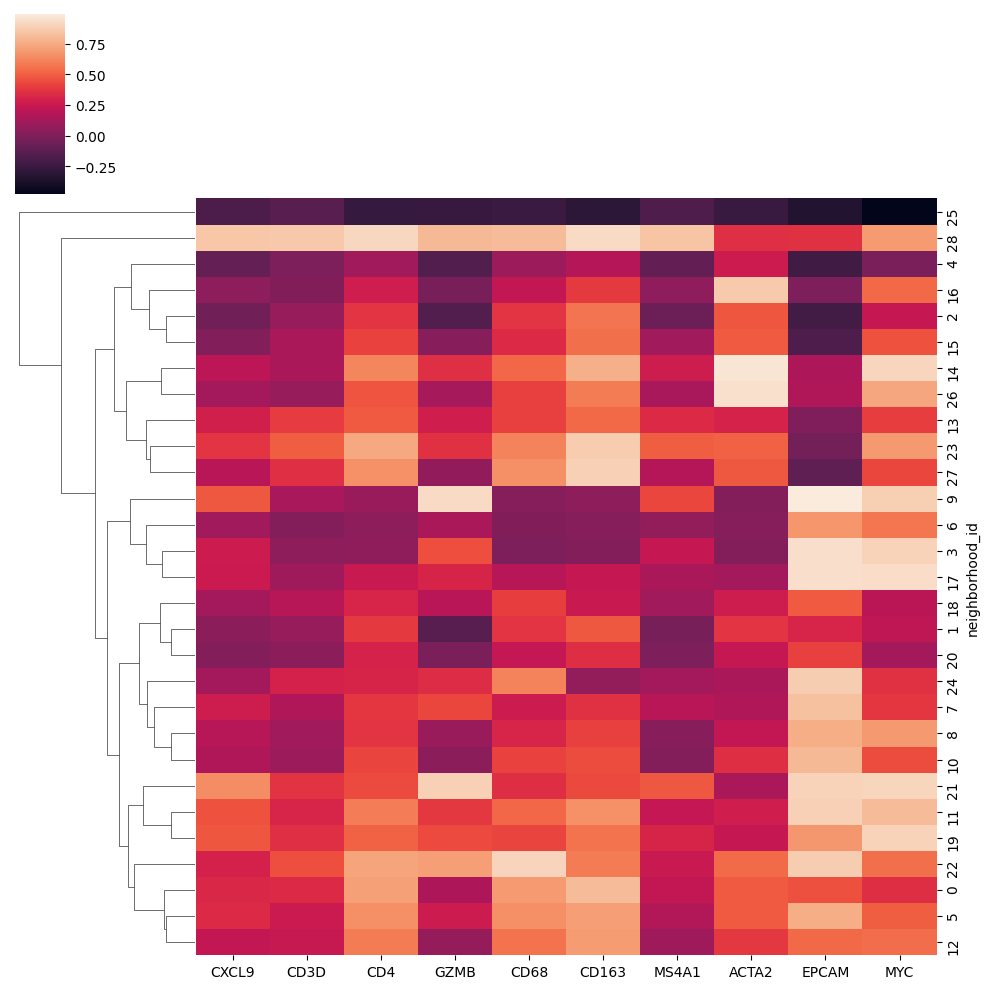

In [27]:
sns.clustermap(
    cluster_df[['CXCL9', 'CD3D', 'CD4', 'GZMB', 'CD68', 'CD163', 'MS4A1', 'ACTA2', 'EPCAM', 'MYC']],
    row_cluster=True, col_cluster=False
)
plt.savefig(os.path.join(out_dir, 'xenium_genes_heatmap.pdf'))

In [28]:
out_dir

'/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-25943_xenium/outputs'

In [29]:
20,9,28,11,25,7,16,10,17,15,24

(20, 9, 28, 11, 25, 7, 16, 10, 17, 15, 24)

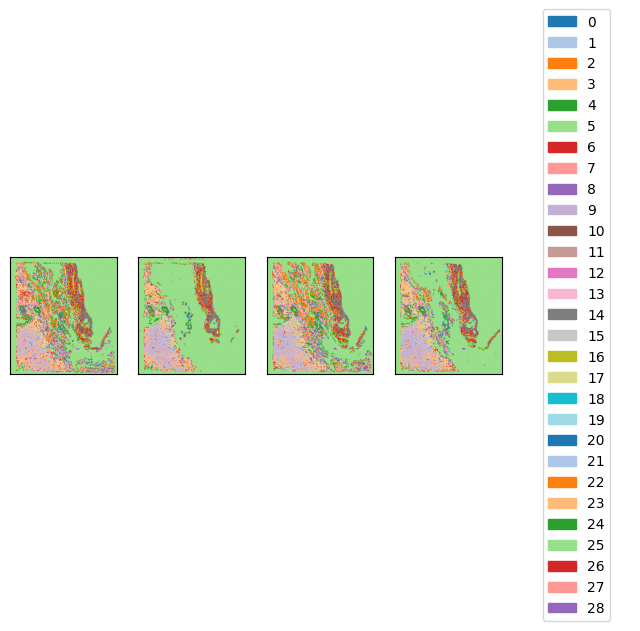

In [30]:
vis_utils.display_clusters(cluster_ids)

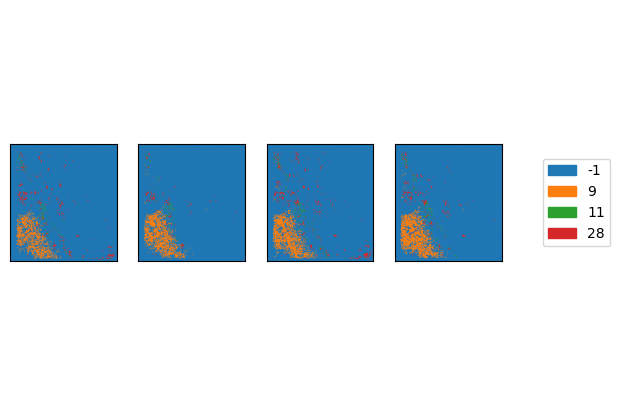

In [31]:
groups = [11,9,28] 

vis_utils.show_groups(cluster_ids, groups)

In [32]:
orig_config = '/data/estorrs/mushroom/data/projects/xenium_grant/mushroom/S18-25943/config.yaml'
orig_config = yaml.safe_load(open(orig_config))
orig_config

[{'data': [{'dtype': 'xenium',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s0_xenium.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'xenium',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s1_xenium.h5ad'}],
  'id': 's1',
  'position': 15},
 {'data': [{'dtype': 'xenium',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s2_xenium.h5ad'}],
  'id': 's2',
  'position': 35},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s3_multiplex.ome.tiff'}],
  'id': 's3',
  'position': 40},
 {'data': [{'dtype': 'xenium',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s4_xenium.h5ad'}],
  'id': 's4',
  'position': 50},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s5_multiplex.o

In [33]:
fps = [mapping['filepath'] for entry in orig_config for mapping in entry['data'] if mapping['dtype']=='xenium']
fps

['/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s0_xenium.h5ad',
 '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s1_xenium.h5ad',
 '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s2_xenium.h5ad',
 '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s4_xenium.h5ad']

In [34]:
names = ['S18-25943-U1', 'S18-25943-U4', 'S18-25943-U8', 'S18-25943-U11']
for i, fp in enumerate(fps):
    print(fp)
    adata = sc.read_h5ad(fp)
    _ = adata.uns.pop('transcripts')
    fullres_size = visium.get_fullres_size(adata)
    scale = fullres_size[-2] / cluster_ids.shape[-2]
    
    pts = (adata.obsm['spatial'] / scale).astype(int)
    adata.obs['x_scaled'] = pts[:, 0]
    adata.obs['y_scaled'] = pts[:, 1]
    adata.obs['neighborhood_id'] = [cluster_ids[i, r, c] for c, r in zip(adata.obs['x_scaled'], adata.obs['y_scaled'])]
    
    data = []
    for barcode, nbhd in zip(adata.obs.index.to_list(), adata.obs['neighborhood_id']):
        data.append([barcode, nbhd])
    df = pd.DataFrame(data=data, columns=['cell_id', 'neighborhood'])
    df.to_csv(os.path.join(out_dir, f'{names[i]}_nbhds.txt'), sep='\t', index=False)


/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s0_xenium.h5ad
/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s1_xenium.h5ad
/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s2_xenium.h5ad
/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s4_xenium.h5ad


In [49]:
adata = sc.read_h5ad(fps[0])
adata

AnnData object with n_obs × n_vars = 446471 × 477
    obs: 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'transcripts'
    obsm: 'spatial'

In [84]:
adata.obs

,x_centroid,y_centroid,transcript_counts,control_probe_counts,control_codeword_counts,unassigned_codeword_counts,deprecated_codeword_counts,total_counts,cell_area,nucleus_area,x_scaled,y_scaled,neighborhood_id
cell_id,,,,,,,,,,,,,
aaaacdnp-1,819.839661,7175.792480,309,0,0,0,0,309,198.958445,37.208751,12,111,3
aaaagkol-1,841.760010,7175.819824,279,0,0,0,0,279,174.980475,44.659533,13,111,6
aaaalcdn-1,828.290039,7181.588867,237,0,0,0,0,237,166.084694,40.369689,12,111,3
aaaaofek-1,849.105652,7186.784180,209,0,0,0,0,209,129.327505,43.124220,13,111,6
aaaapcln-1,833.255737,7191.932617,203,0,0,0,0,203,135.197817,40.053595,12,111,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
oimbldpd-1,9399.467773,7732.623535,166,0,0,0,0,166,91.892972,17.610938,145,120,25
oimbnimg-1,9355.897461,7732.576172,89,0,0,0,0,89,61.141565,9.302188,145,120,25
oimbnpag-1,9364.294922,7734.132812,129,0,0,0,0,129,67.644065,9.392500,145,120,25


In [52]:
cluster_ids.shape

(4, 180, 164)

In [54]:
fullres_size = visium.get_fullres_size(adata)
scale = 

(11593, 10270)

In [ ]:
scaled_size_nopad = tuple([int(x * self.scale) for x in fullres_size])
pad_h, pad_w = [x - y for x, y in zip(self.scaled_size, self.scaled_size_nopad)]
self.border = [
    pad_w // 2, pad_h // 2, pad_w // 2 + pad_w % 2, pad_h // 2 + pad_h % 2 # left, top, right, bottom
]

In [59]:
11593 / 64, 10270 / 64

(181.140625, 160.46875)

In [57]:
x = next(iter(mushroom.learner.train_ds.section_to_img.values()))
x.shape

torch.Size([477, 182, 161])

In [63]:
mushroom.learner.inference_ds.ph, mushroom.learner.inference_ds.pw

(41, 45)

In [64]:
41 * 4, 45 * 4

(164, 180)

In [65]:
scale = fullres_size[-2] / cluster_ids.shape[-2]
scale

64.40555555555555

In [72]:
pts = (adata.obsm['spatial'] / scale).astype(int)
adata.obs['x_scaled'] = pts[:, 0]
adata.obs['y_scaled'] = pts[:, 1]



In [74]:
adata.obs['neighborhood_id'] = [cluster_ids[0, r, c] for c, r in zip(adata.obs['x_scaled'], adata.obs['y_scaled'])]

In [82]:
colors = sns.color_palette('tab20') + sns.color_palette('tab20b')
cs = [colors[i] for i in adata.obs['neighborhood_id']]

(-5.8500000000000005, 166.85, 187.95, -8.950000000000001)

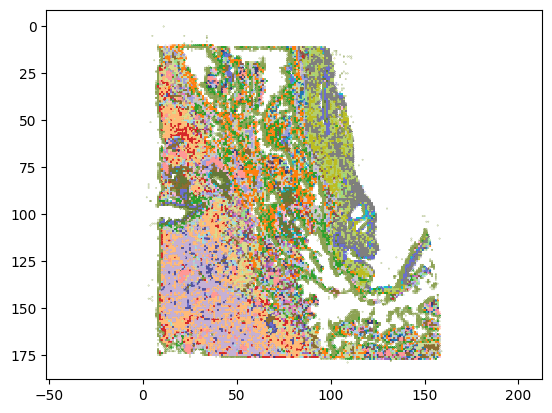

In [83]:
plt.scatter(adata.obs['x_scaled'], adata.obs['y_scaled'], c=cs, s=.05)
plt.gca().invert_yaxis()
plt.axis('equal')

In [ ]:
barcode_to_id = {}

In [34]:
import mushroom.data.multiplex as multiplex

In [35]:
config

[{'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s0_multiplex.ome.tiff'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 15},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 35},
 {'data': [{'dtype': 'multiplex_codex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s3_multiplex.ome.tiff'}],
  'id': 's3',
  'position': 40},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s4_multiplex.ome.tiff'}],
  'id': 's4',
  'position': 50},
 {'data': [{'dtype': 'multiplex_codex',
    'filepath': '/data/estorrs/mushroom/data/proje

In [36]:
fps = [mapping['filepath'] for entry in config for mapping in entry['data'] if mapping['dtype']=='multiplex_codex']
fps

['/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s3_multiplex.ome.tiff',
 '/data/estorrs/mushroom/data/projects/xenium_grant/registered/S18-25943/s5_multiplex.ome.tiff']

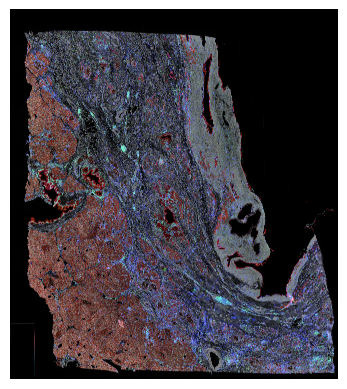

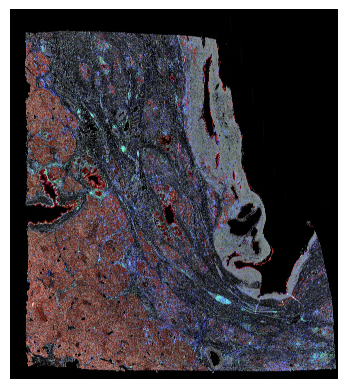

In [37]:
# bbox = (6000, 7000, 3000, 4000)
bbox = None
scale = .1

cmap = {
    'E-cadherin': (1., 0., 0.),
    'CD3e': (0., 1., 0.),
    'Vimentin': (1., 1., 1.),
#     'SMA': (1., 1., 0.),
    'HLA-DR': (0., 0., 1.),
}
contrast_mapping = {
    'E-cadherin': 90.,
    'CD3e': 98.,
    'HLA-DR': 90.,
    'Vimentin': 80.,
#     'CD31': 99.,
}

for fp in fps:
    channel_to_img = multiplex.extract_ome_tiff(fp, bbox=bbox, scale=scale)
    rgb = multiplex.make_pseudo(
        {c:img for c, img in channel_to_img.items() if c in cmap},
        cmap=cmap, contrast_mapping=contrast_mapping)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

In [38]:
mushroom.learner.channels

['ABCC11',
 'ACAN',
 'ACE2',
 'ACKR1',
 'ACTA2',
 'ACTG2',
 'ADAM28',
 'ADAMTS1',
 'ADGRE1',
 'ADGRL4',
 'ADH1C',
 'ADH4',
 'ADIPOQ',
 'AGER',
 'AGR3',
 'AHSP',
 'AIF1',
 'ALAS2',
 'ALDH1A3',
 'AMY2A',
 'AMY2B',
 'ANGPT2',
 'ANPEP',
 'APCDD1',
 'APOA5',
 'APOBEC3A',
 'APOLD1',
 'AQP2',
 'AQP3',
 'AQP8',
 'AQP9',
 'AR',
 'AREG',
 'ARFGEF3',
 'ASCL1',
 'ASCL3',
 'ASPN',
 'ATP6V1C1',
 'AVPR2',
 'AZGP1',
 'B3GAT1',
 'BAMBI',
 'BANK1',
 'BASP1',
 'BBOX1',
 'BCL2L11',
 'BMX',
 'BTNL9',
 'C15orf48',
 'C1orf162',
 'C1orf194',
 'C20orf85',
 'C5orf46',
 'C6orf118',
 'C7',
 'CA4',
 'CA9',
 'CALB1',
 'CALCR',
 'CAPN8',
 'CAV1',
 'CAVIN1',
 'CAVIN2',
 'CCDC39',
 'CCDC78',
 'CCL19',
 'CCL27',
 'CCL5',
 'CCNB2',
 'CCR2',
 'CCR7',
 'CD14',
 'CD163',
 'CD19',
 'CD1A',
 'CD1C',
 'CD1E',
 'CD2',
 'CD247',
 'CD27',
 'CD274',
 'CD28',
 'CD300E',
 'CD34',
 'CD3D',
 'CD3E',
 'CD4',
 'CD44',
 'CD5L',
 'CD68',
 'CD69',
 'CD70',
 'CD79A',
 'CD83',
 'CD86',
 'CD8A',
 'CD93',
 'CDH1',
 'CDH11',
 'CDH16',
 'CDK1',

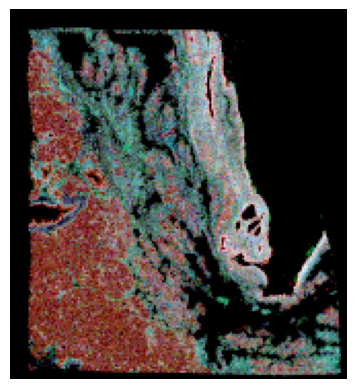

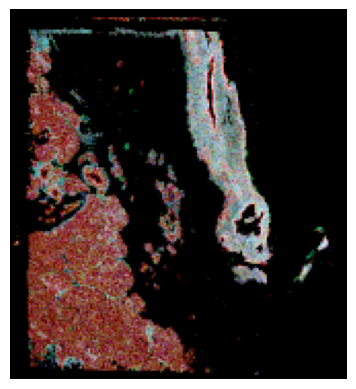

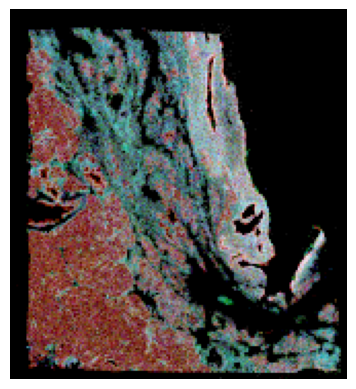

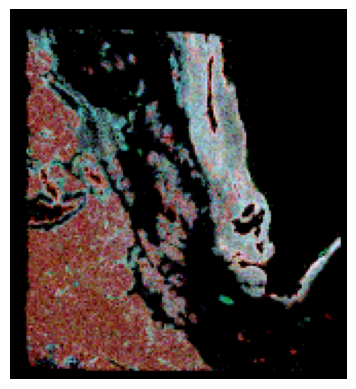

In [42]:
cmap = {
    'EPCAM': (1., 0., 0.),
    'PTPRC': (0., 1., 0.),
    'ACTA2': (1., 1., 1.),
#     'HLA-DQB2': (0., 0., 1.),
    'CD4': (0., 0., 1.),
}
# contrast_mapping = {
#     'Pan-Cytokeratin': 40.,
#     'CD3e': 98.,
#     'HLA-DR': 90.,
#     'Vimentin': 80.,
# #     'CD31': 99.,
# }

for img in mushroom.true_imgs:
    channel_to_img = {c:img[i].numpy() for i, c in enumerate(mushroom.learner.channels)
                     if c in cmap}
    rgb = multiplex.make_pseudo(
        channel_to_img, cmap=cmap, contrast_pct=100.)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

In [43]:
mushroom.true_imgs[0].shape

torch.Size([477, 180, 164])

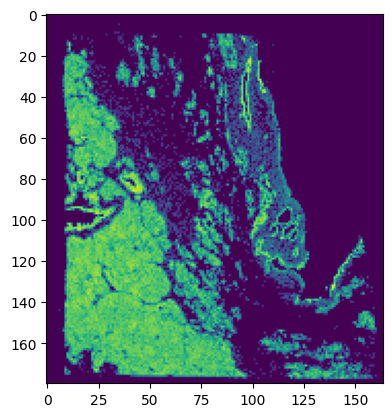

In [44]:
plt.imshow(mushroom.true_imgs[0, mushroom.learner.channels.index('EPCAM')])